In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import load_img,img_to_array

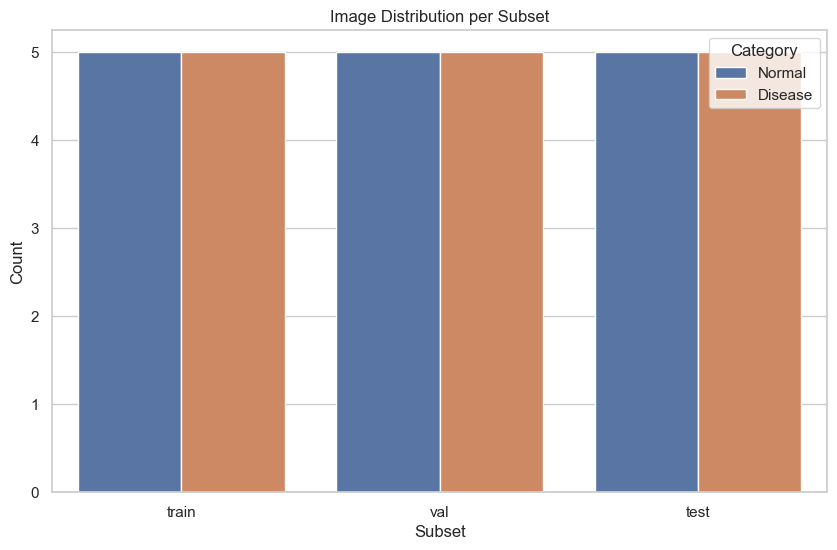

In [2]:
base_dir = '../dataset'
subsets = ['train','val','test']
categories = ['Normal','Disease']

def plot_img_distribution():
    data = {}
    for subset in subsets:
        data[subset] = {}
        for category in categories:
            path = os.path.join(base_dir, subset, category)
            data[subset][category] = len(os.listdir(path))
    
    df_data = {
        "Subset":[],
        "Category":[],
        "Count":[]
    }
    for subset in data:
        for category in data[subset]:
            df_data["Subset"].append(subset)
            df_data["Category"].append(category)
            df_data["Count"].append(data[subset][category])
    sns.set(style="whitegrid")
    plt.figure(figsize=(10,6))
    sns.barplot(x="Subset",y="Count",hue="Category",data=df_data)
    plt.title("Image Distribution per Subset")
    plt.show()

plot_img_distribution()

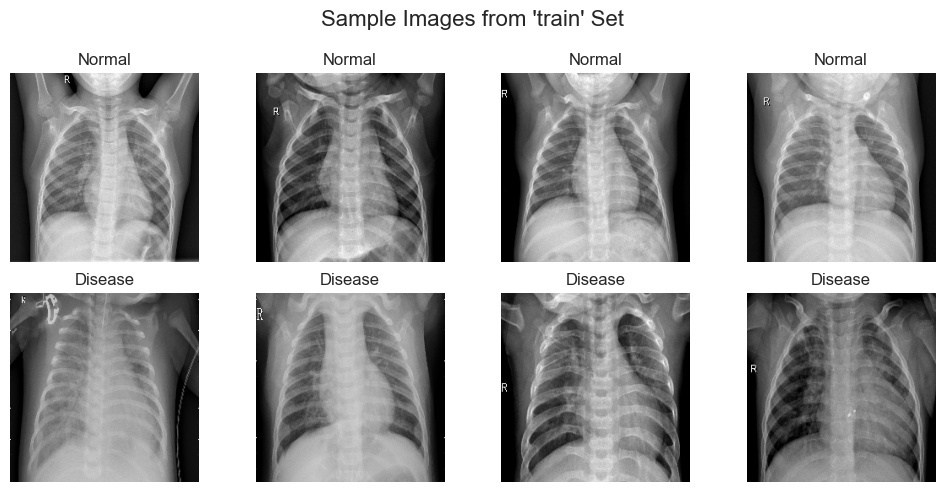

In [3]:
#2.Sample Images per class
#this defines a function named show_sample_images with two otional parameters
#subset: the folder from which to show images 
#num_images : number of images to display per category/class
#Counter i is used to assign subplot positions
#Loops through all class labels stored in categories list
#Constructs the full path to the folder containing images for the current class
#Iterates over each selected image
#Builds the full path to the image
#Loads the image and resize it to 224*224 pixels
#Adds a supert titile to the figure indicating whether its from the train/val/test
#uses tight layout() to optimize spacing


def show_sample_images(subset = 'train',num_images = 4):
    plt.figure(figsize=(10,5))
    i=1
    for category in categories:
        path = os.path.join(base_dir,subset,category)
        images = os.listdir(path)[:num_images]
        for img_name in images:
            img_path = os.path.join(path,img_name)
            img = load_img(img_path,target_size=(224,224))
            plt.subplot(len(categories),num_images,i)
            plt.imshow(img)
            plt.title(category)
            plt.axis('off')
            i+=1
    plt.suptitle(f"Sample Images from '{subset}' Set",fontsize=16)
    plt.tight_layout()
    plt.show()
show_sample_images('train')

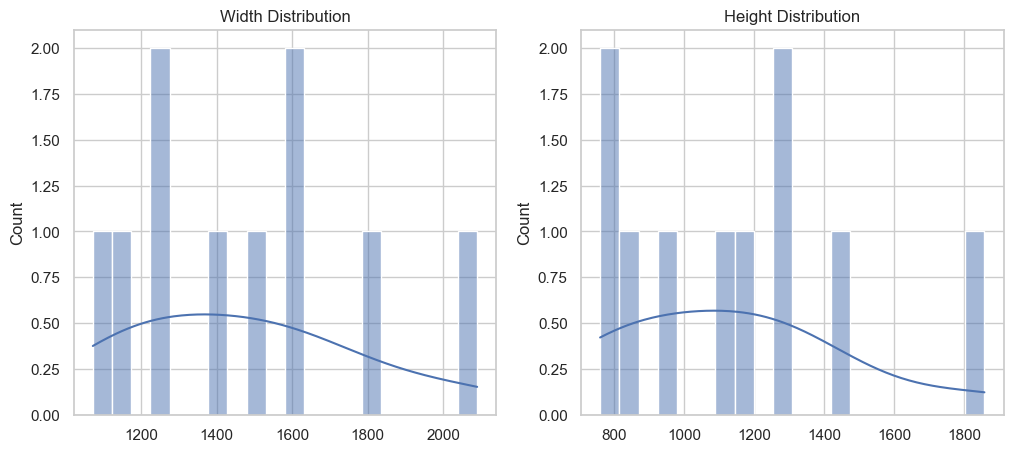

In [7]:
# 3. image size distribution
# Explanation: Image size Distribution Function
#The function plot_image_distribution(subset = 'train' ) is designed to 
# analyze and visualize the distribution of image dimensions
#(Width and height) in a given dataset subset(train, test or validation)
#here's a breakdown of its components:
#Purpose to inspect and understand how image size varies in a dataset
#Deciding whether resizing or padding is needed before feeding images into a model
#Detecting any inconsistnce or outliers in image resolution
#these list store the width and height of all images in the dataset subset
#iterates through each categoryto avoid memory issues and speed up analysis
#Samples 100 images from each category to plot the distribution
#uses cv2.imread() to read the image
#Extracts its height h and width w
#Appends the dimensionns

def plot_image_distribution(subset = 'train'):
    # Initialize lists to store image dimensions
    widths = []
    heights = []
    # Iterate through each category
    for category in categories:
        path = os.path.join(base_dir, subset, category)
        for file in os.listdir(path)[:100]:
            img_path = os.path.join(path, file)
            img = cv2.imread(img_path)
            if img is not None:
                h,w = img.shape[:2]
                widths.append(w)
                heights.append(h)
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.histplot(widths,bins=20,kde=True)
    plt.title('Width Distribution')
    plt.subplot(1,2,2)
    sns.histplot(heights,bins=20,kde=True)
    plt.title('Height Distribution')
    plt.show()
plot_image_distribution('train')